# Logistic Regression on Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

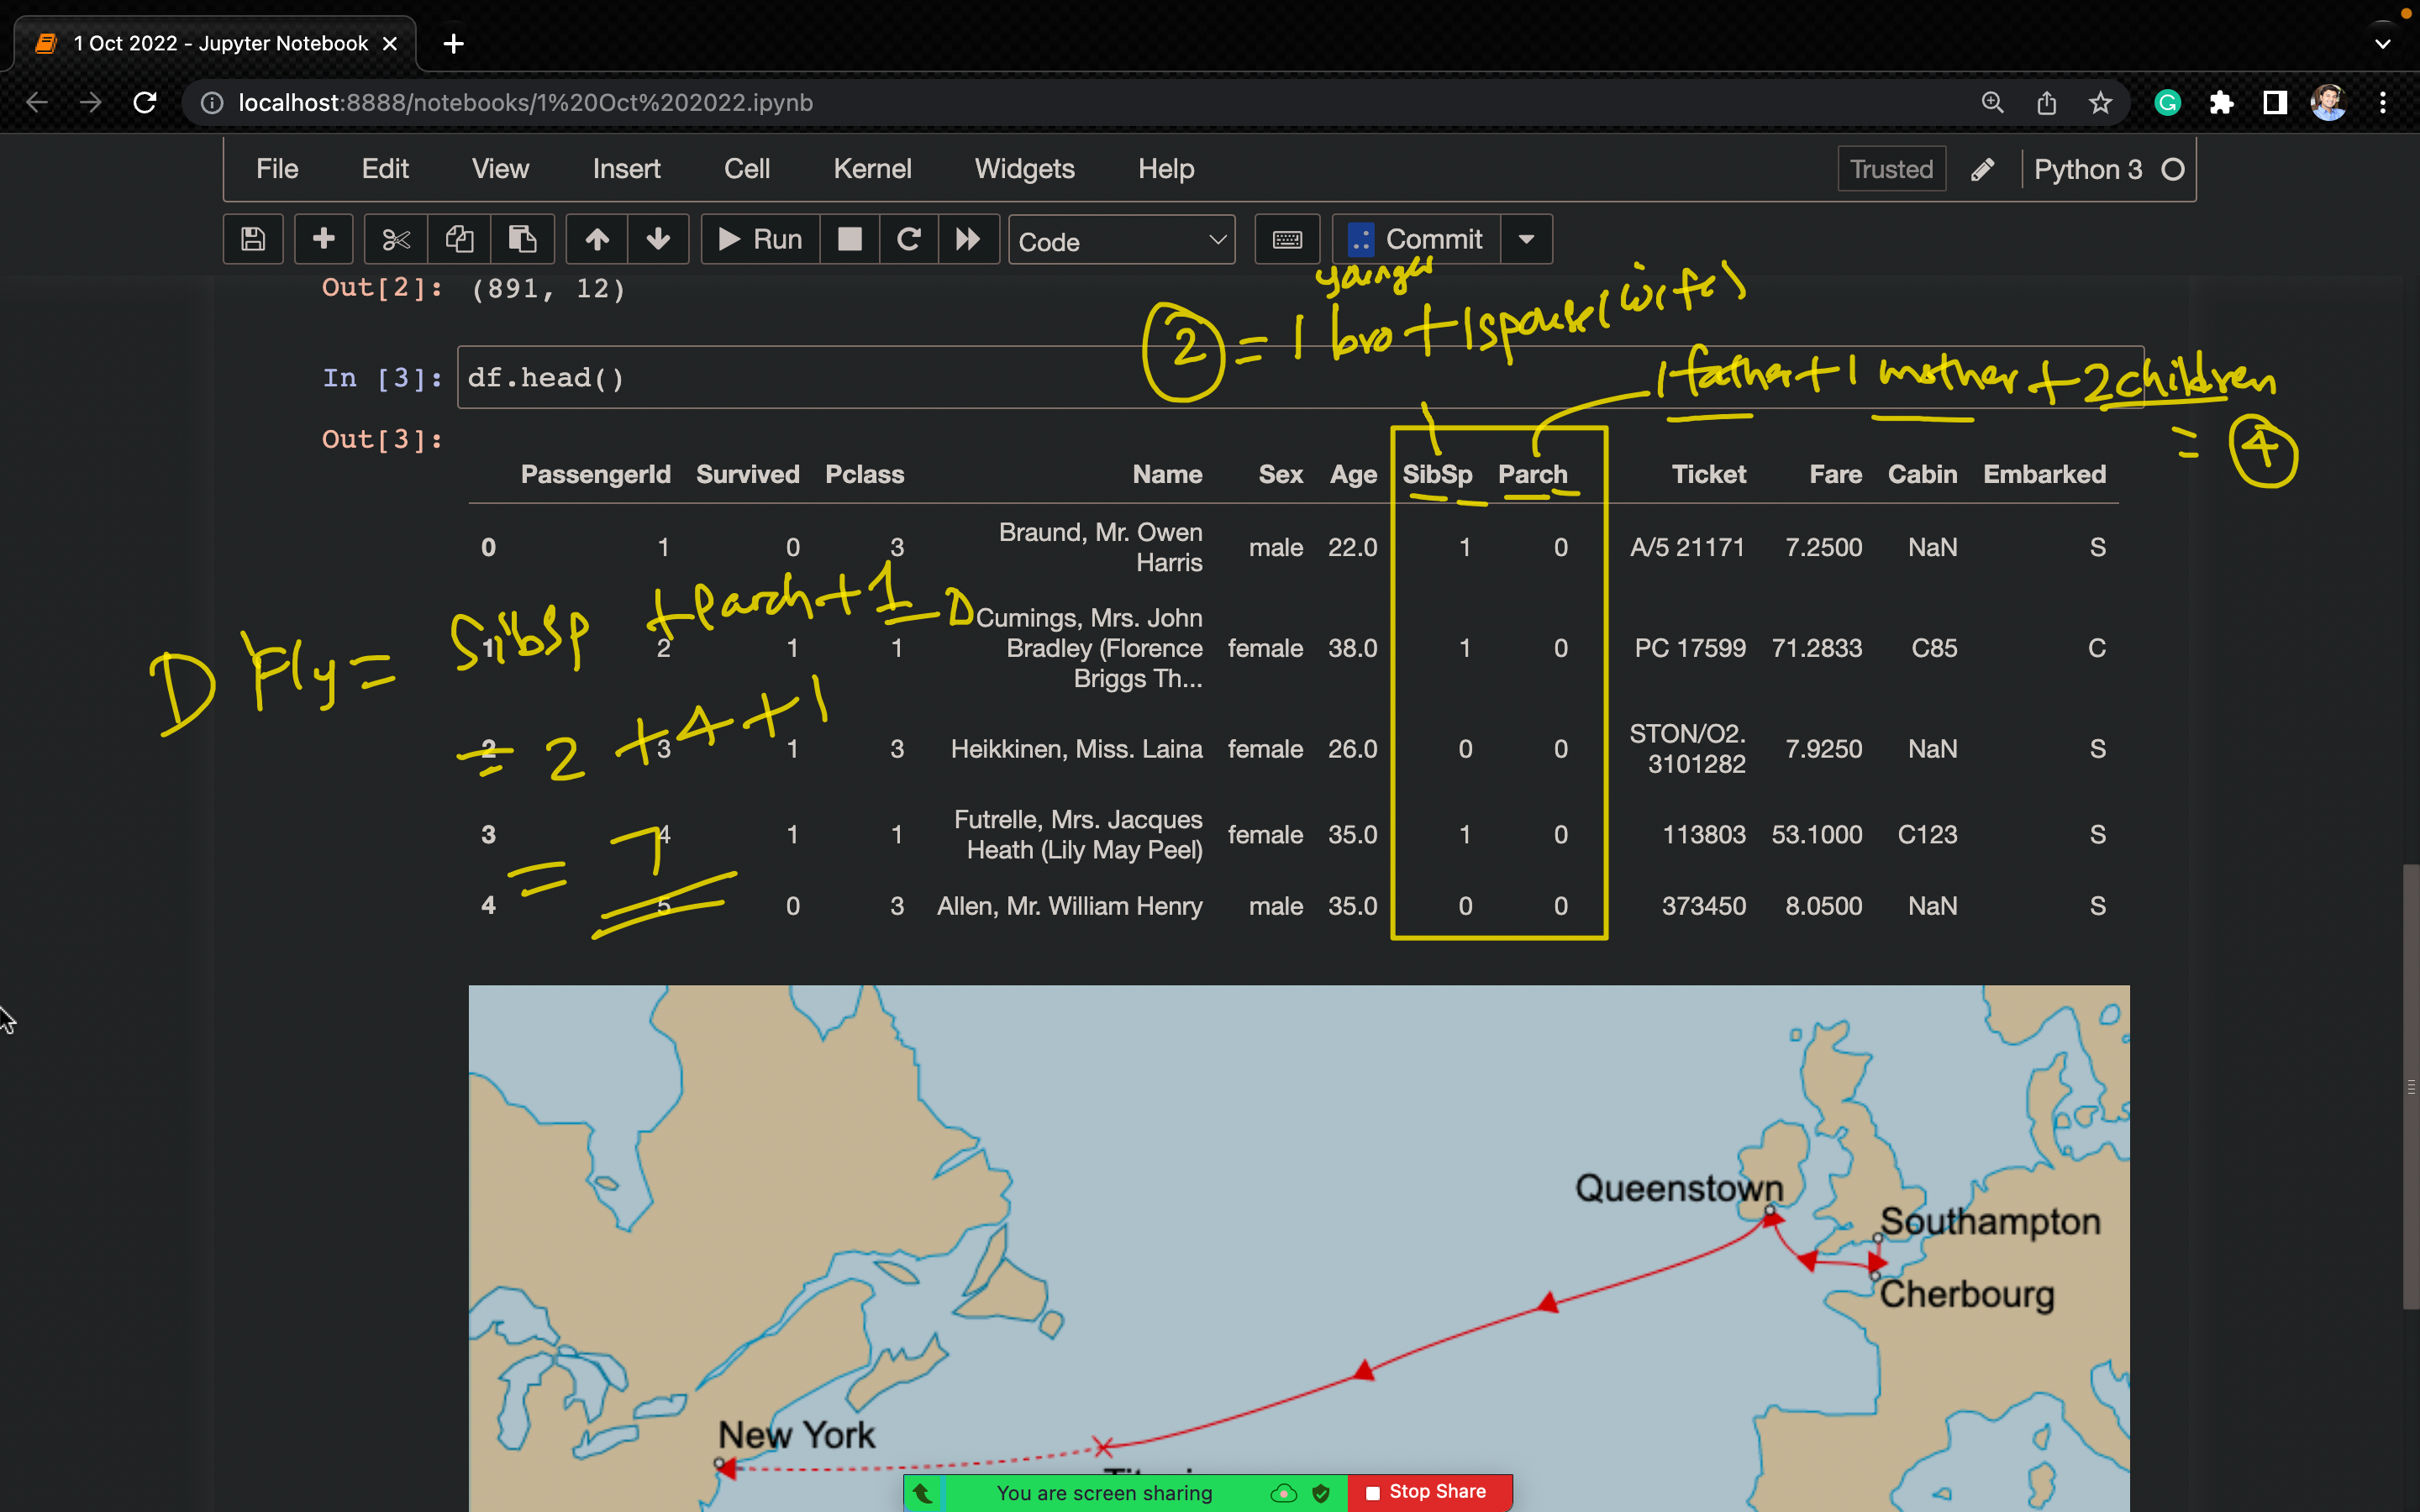

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
df.drop(['Cabin'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
cat_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [10]:
for c in cat_cols:
    print(df[c].value_counts())
    print("="*70)

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
df.Embarked.mode()

0    S
dtype: object

In [12]:
df.Embarked.mode()[0]

'S'

In [13]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

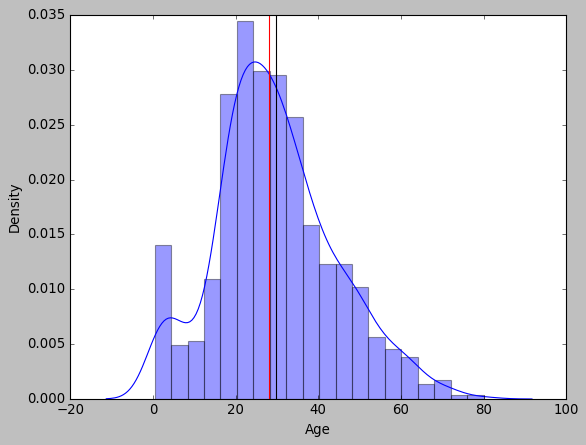

In [15]:
plt.style.use("classic")

sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='black')
plt.axvline(df.Age.median(), color='red')
plt.show()

In [16]:
df.Age.fillna(df.Age.median(), inplace=True)
df.isna().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [17]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

# Goal:

The goal is to predict the survival of the passengers traveling in RMS Titanic ship given the other details.

# Feature Engineering

It is a process of engineering new meaningful columns from currently existing columns.

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

In [19]:
df.sample(4)

PassengerId  Survived  Pclass  \
85            86         1       3   
14            15         0       3   
542          543         0       3   
362          363         0       3   

                                                  Name     Sex   Age  SibSp  \
85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...  female  33.0      3   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
362                    Barbara, Mrs. (Catherine David)  female  45.0      0   

     Parch   Ticket     Fare Embarked  FamilySize  
85       0  3101278  15.8500        S           4  
14       0   350406   7.8542        S           1  
542      2   347082  31.2750        S           7  
362      1     2691  14.4542        C           2

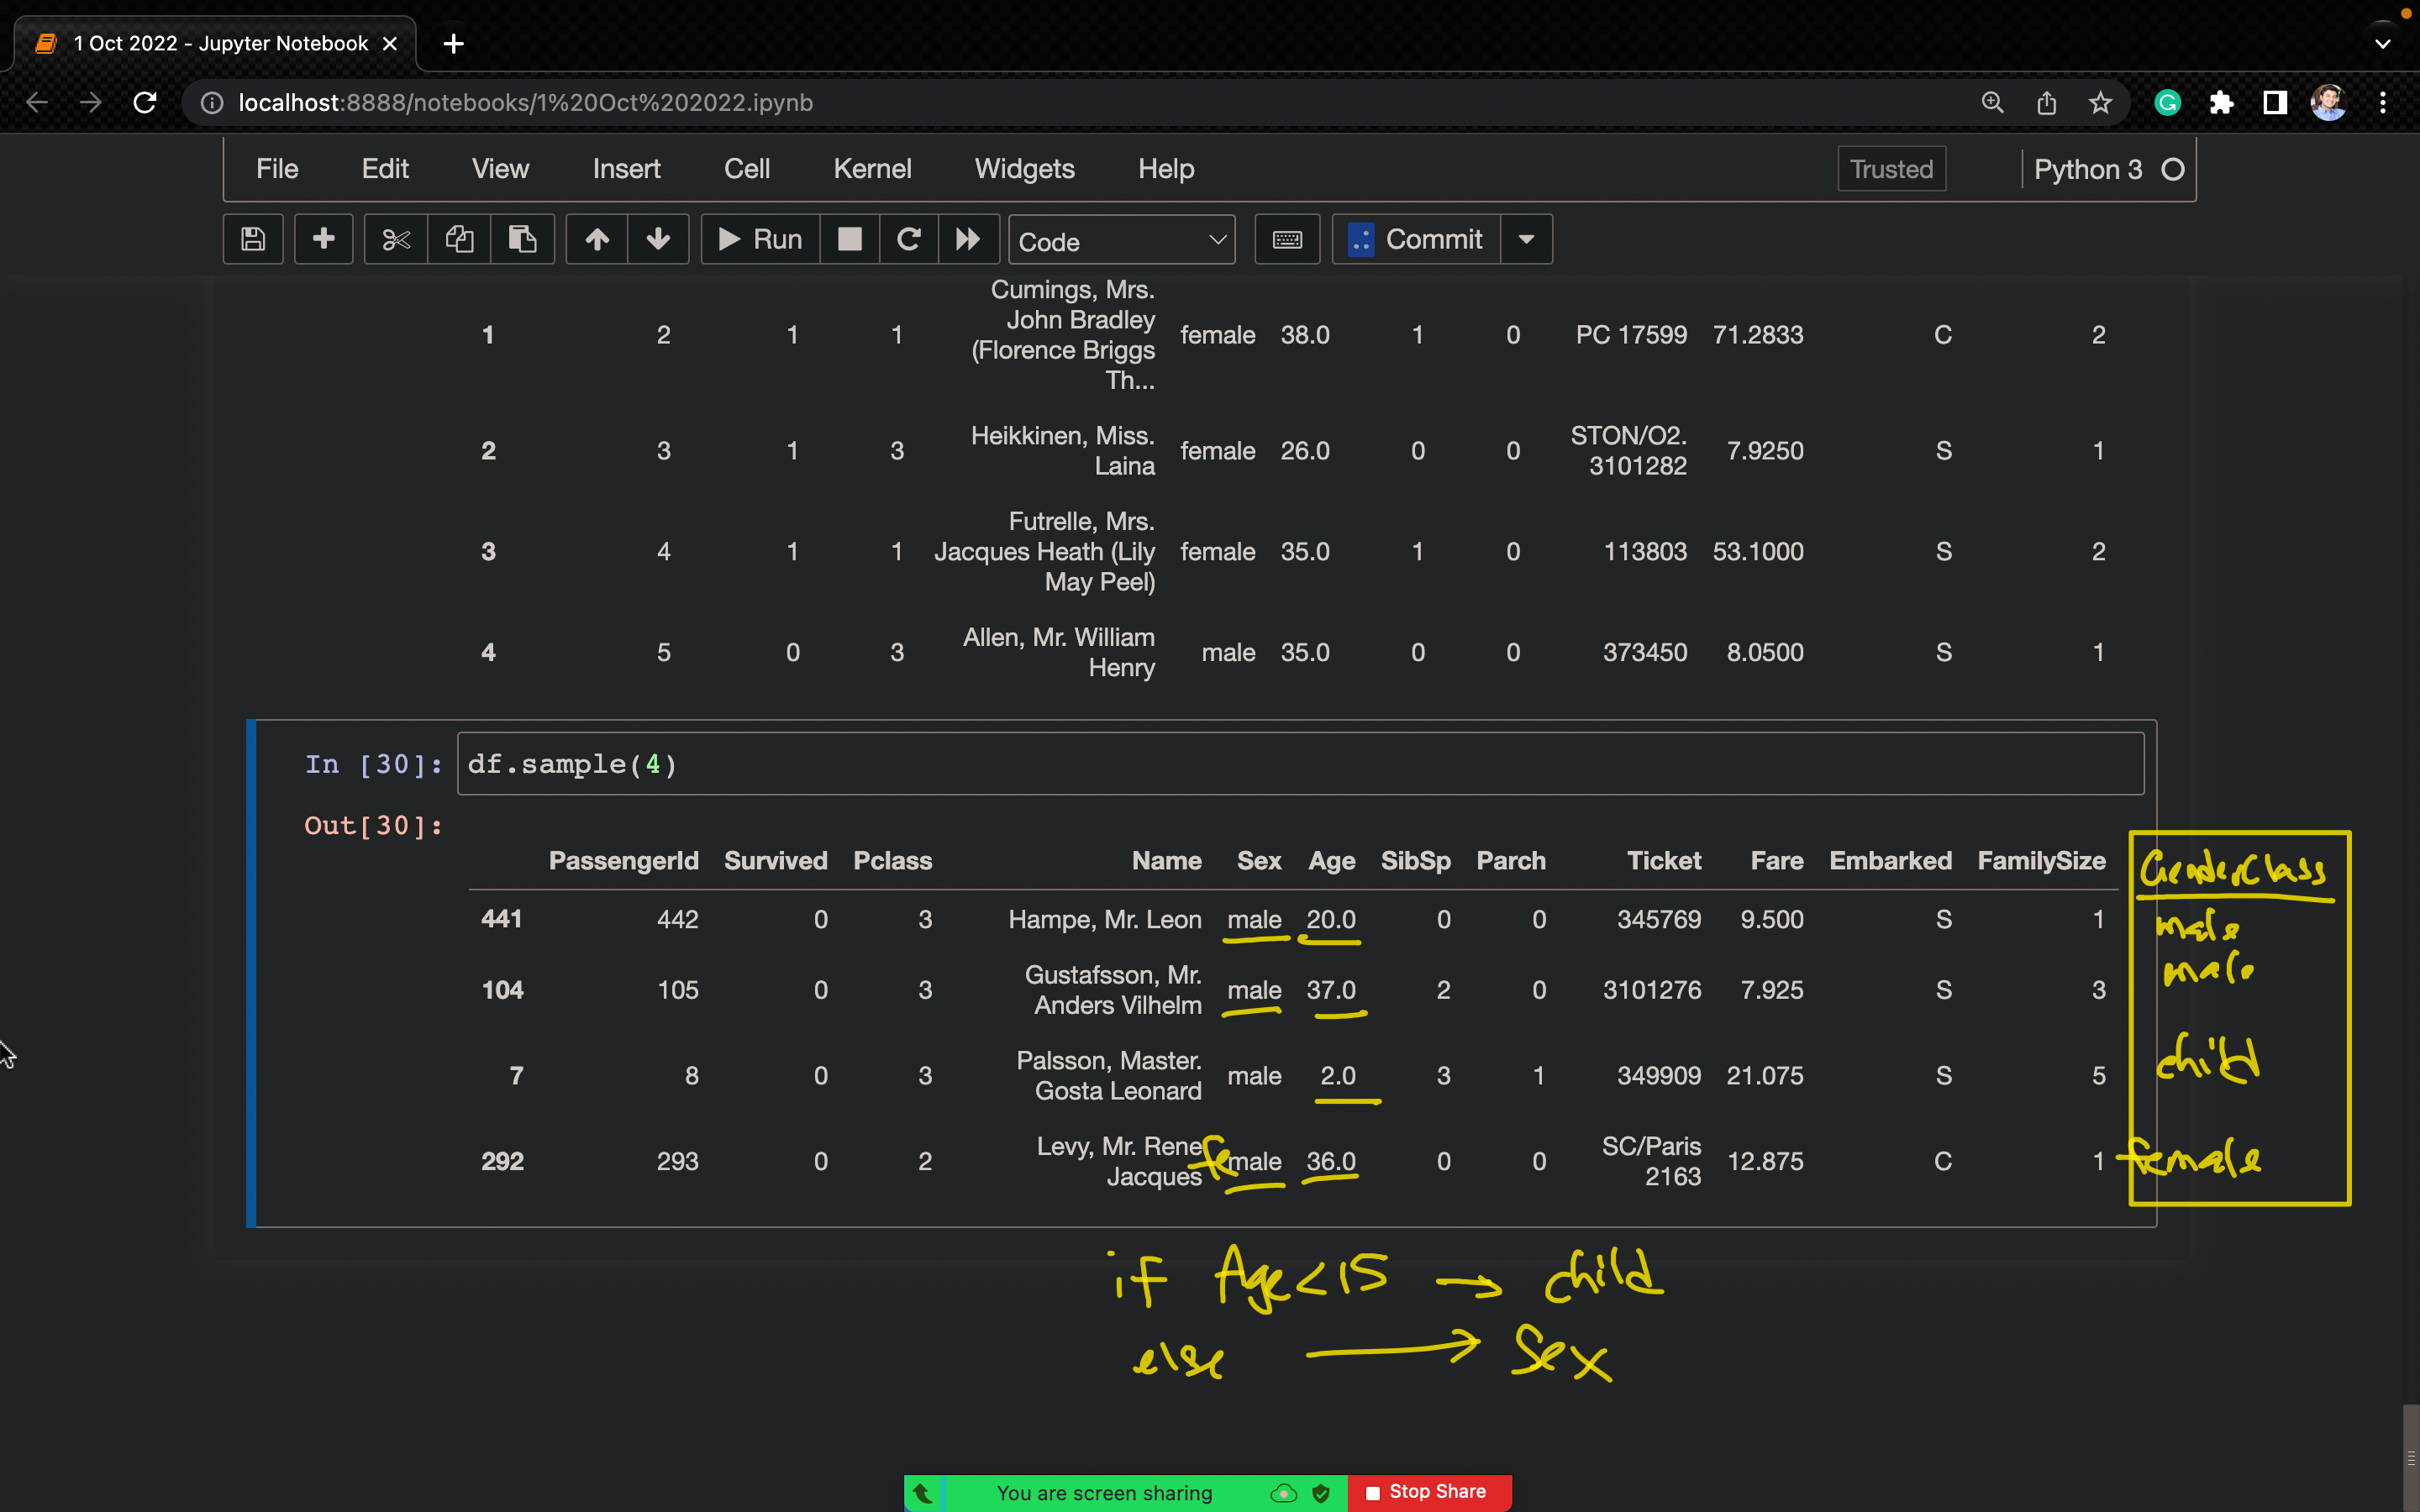

In [20]:
df['GenderClass'] = df.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1)

In [21]:
df.sample(5)

PassengerId  Survived  Pclass  \
298          299         1       1   
427          428         1       2   
178          179         0       2   
820          821         1       1   
96            97         0       1   

                                                  Name     Sex   Age  SibSp  \
298                              Saalfeld, Mr. Adolphe    male  28.0      0   
427  Phillips, Miss. Kate Florence ("Mrs Kate Louis...  female  19.0      0   
178                                 Hale, Mr. Reginald    male  30.0      0   
820  Hays, Mrs. Charles Melville (Clara Jennings Gr...  female  52.0      1   
96                           Goldschmidt, Mr. George B    male  71.0      0   

     Parch    Ticket     Fare Embarked  FamilySize GenderClass  
298      0     19988  30.5000        S           1        male  
427      0    250655  26.0000        S           1      female  
178      0    250653  13.0000        S           1        male  
820      1     12749  93.5000        S           3      female  
96       0  PC 17754  34.6542        C           1        male

In [22]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

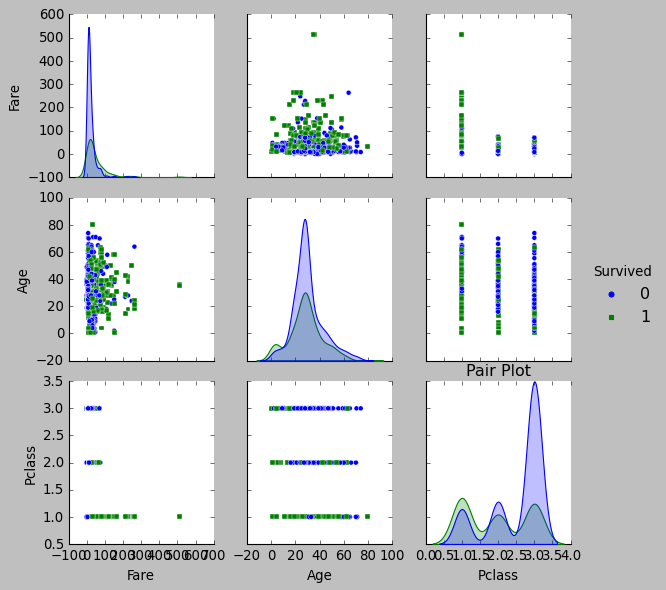

In [23]:
sns.pairplot(df[['Fare','Age','Pclass','Survived']],
            vars=['Fare','Age','Pclass'], hue='Survived',
            markers=['o','s'])
plt.title("Pair Plot")
plt.show()

In [24]:
cor = df.corr()
cor

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.245619  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.096688   -0.245619  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySize   0.217138    1.000000

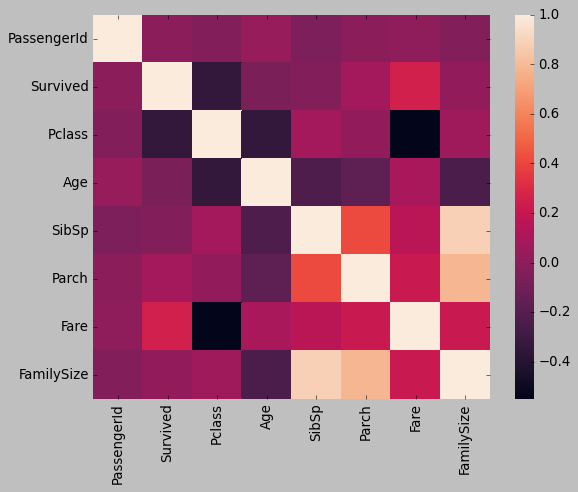

In [25]:
sns.heatmap(cor)
plt.show()

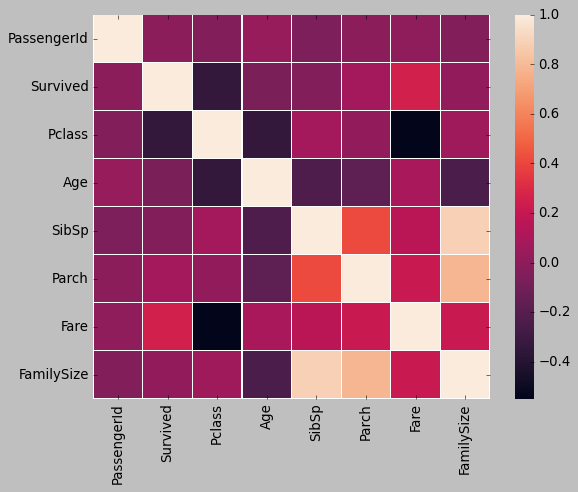

In [26]:
sns.heatmap(cor, linewidth=0.1)
plt.show()

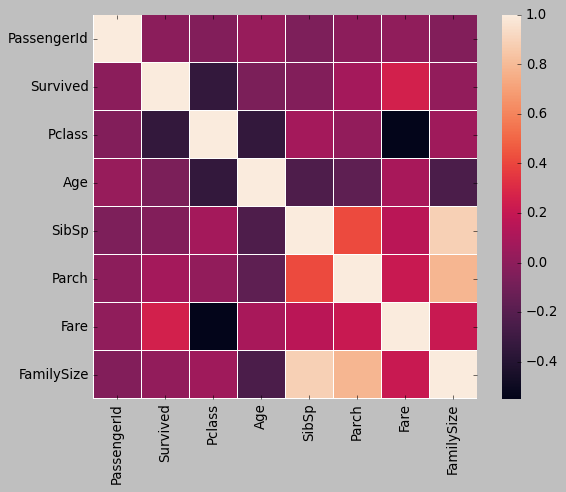

In [27]:
sns.heatmap(cor, linewidth=0.1, square=True)
plt.show()

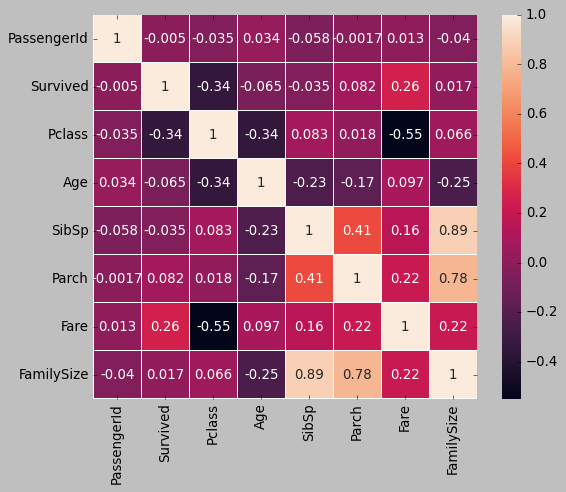

In [28]:
sns.heatmap(cor, linewidth=0.1, square=True, annot=True)
plt.show()

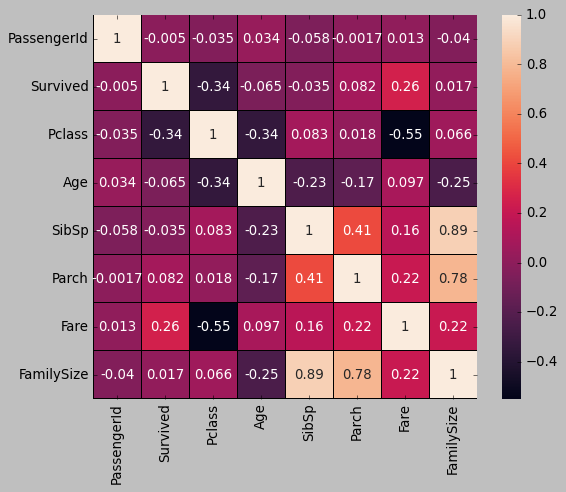

In [29]:
sns.heatmap(cor, linewidth=0.1, square=True, annot=True, linecolor='black')
plt.show()

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [31]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket'], axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'GenderClass'],
      dtype='object')

In [32]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3  22.0      1      0   7.2500        S           2   
1         1       1  38.0      1      0  71.2833        C           2   
2         1       3  26.0      0      0   7.9250        S           1   
3         1       1  35.0      1      0  53.1000        S           2   
4         0       3  35.0      0      0   8.0500        S           1   

  GenderClass  
0        male  
1      female  
2      female  
3      female  
4        male

# Dummification / One Hot Encoding

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [33]:
df = pd.get_dummies(df, columns=['Embarked','GenderClass'], drop_first=True)
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  Embarked_Q  \
0         0       3  22.0      1      0   7.2500           2           0   
1         1       1  38.0      1      0  71.2833           2           0   
2         1       3  26.0      0      0   7.9250           1           0   
3         1       1  35.0      1      0  53.1000           2           0   
4         0       3  35.0      0      0   8.0500           1           0   

   Embarked_S  GenderClass_female  GenderClass_male  
0           1                   0                 1  
1           0                   1                 0  
2           1                   1                 0  
3           1                   1                 0  
4           1                   0                 1

In [34]:
df.drop(['SibSp','Parch'], axis=1, inplace=True)
df.head()

Survived  Pclass   Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
0         0       3  22.0   7.2500           2           0           1   
1         1       1  38.0  71.2833           2           0           0   
2         1       3  26.0   7.9250           1           0           1   
3         1       1  35.0  53.1000           2           0           1   
4         0       3  35.0   8.0500           1           0           1   

   GenderClass_female  GenderClass_male  
0                   0                 1  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   0                 1

In [35]:
X = df.loc[:,df.columns!='Survived']
X.head()

Pclass   Age     Fare  FamilySize  Embarked_Q  Embarked_S  \
0       3  22.0   7.2500           2           0           1   
1       1  38.0  71.2833           2           0           0   
2       3  26.0   7.9250           1           0           1   
3       1  35.0  53.1000           2           0           1   
4       3  35.0   8.0500           1           0           1   

   GenderClass_female  GenderClass_male  
0                   0                 1  
1                   1                 0  
2                   1                 0  
3                   1                 0  
4                   0                 1

In [36]:
y = df.Survived

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [40]:
num_cols = ['Pclass','Age','Fare','FamilySize']
num_cols

['Pclass', 'Age', 'Fare', 'FamilySize']

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train[num_cols] = mms.fit_transform(X_train[num_cols])
X_test[num_cols] = mms.transform(X_test[num_cols])

In [42]:
X_train.head()

Pclass       Age      Fare  FamilySize  Embarked_Q  Embarked_S  \
301     1.0  0.346569  0.045381         0.2           1           0   
309     0.0  0.371701  0.111118         0.0           0           0   
516     0.5  0.421965  0.020495         0.0           0           1   
120     0.5  0.258608  0.143462         0.2           0           1   
570     0.5  0.773813  0.020495         0.0           0           1   

     GenderClass_female  GenderClass_male  
301                   0                 1  
309                   1                 0  
516                   1                 0  
120                   0                 1  
570                   0                 1

In [43]:
X_train.describe()

Pclass         Age        Fare  FamilySize  Embarked_Q  Embarked_S  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.650281    0.368285    0.062365    0.086517    0.089888    0.723315   
std      0.418322    0.167070    0.090399    0.150529    0.286222    0.447674   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.500000    0.271174    0.015412    0.000000    0.000000    0.000000   
50%      1.000000    0.346569    0.028221    0.000000    0.000000    1.000000   
75%      1.000000    0.447097    0.059914    0.100000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       GenderClass_female  GenderClass_male  
count          712.000000        712.000000  
mean             0.308989          0.605337  
std              0.462401          0.489122  
min              0.000000          0.000000  
25%              0.000000          0.000000  
50%              0.000000          1.000000  
75%              1.000000          1.000000  
max              1.000000          1.000000

In [44]:
X_test.describe()

Pclass         Age        Fare  FamilySize  Embarked_Q  Embarked_S  \
count  179.000000  179.000000  179.000000  179.000000  179.000000  179.000000   
mean     0.670391    0.345359    0.064820    0.106145    0.072626    0.731844   
std      0.417679    0.148045    0.119973    0.198353    0.260249    0.444242   
min      0.000000    0.004147    0.000000    0.000000    0.000000    0.000000   
25%      0.500000    0.271174    0.015469    0.000000    0.000000    0.000000   
50%      1.000000    0.346569    0.028213    0.000000    0.000000    1.000000   
75%      1.000000    0.396833    0.061045    0.100000    0.000000    1.000000   
max      1.000000    0.761247    1.000000    1.000000    1.000000    1.000000   

       GenderClass_female  GenderClass_male  
count          179.000000        179.000000  
mean             0.307263          0.597765  
std              0.462653          0.491724  
min              0.000000          0.000000  
25%              0.000000          0.000000  
50%              0.000000          1.000000  
75%              1.000000          1.000000  
max              1.000000          1.000000

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
accuracy_score(y_test, y_pred_test)

0.7988826815642458

In [49]:
accuracy_score(y_train, y_pred_train)

0.8314606741573034

In [50]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[93, 13],
       [23, 50]])

In [51]:
CM = pd.DataFrame(cm)
CM

0   1
0  93  13
1  23  50

In [52]:
CM.columns = ['Predicted Died','Predicted Survived']
CM

Predicted Died  Predicted Survived
0              93                  13
1              23                  50

In [53]:
CM.index = ['Actual Died', 'Actual Survived']
CM

Predicted Died  Predicted Survived
Actual Died                  93                  13
Actual Survived              23                  50

In [54]:
(93+50)/(93+13+23+50)

0.7988826815642458

In [55]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [57]:
logreg.predict_proba(X_test)

array([[0.08499898, 0.91500102],
       [0.92989887, 0.07010113],
       [0.15590966, 0.84409034],
       [0.31550516, 0.68449484],
       [0.25233184, 0.74766816],
       [0.92399401, 0.07600599],
       [0.88053923, 0.11946077],
       [0.08642473, 0.91357527],
       [0.5334105 , 0.4665895 ],
       [0.35739052, 0.64260948],
       [0.92742154, 0.07257846],
       [0.3756732 , 0.6243268 ],
       [0.68065231, 0.31934769],
       [0.81985052, 0.18014948],
       [0.31553706, 0.68446294],
       [0.60881021, 0.39118979],
       [0.64341639, 0.35658361],
       [0.93835589, 0.06164411],
       [0.93612745, 0.06387255],
       [0.34257372, 0.65742628],
       [0.93307971, 0.06692029],
       [0.90639876, 0.09360124],
       [0.04060849, 0.95939151],
       [0.79699481, 0.20300519],
       [0.35689915, 0.64310085],
       [0.92906265, 0.07093735],
       [0.07457512, 0.92542488],
       [0.20128297, 0.79871703],
       [0.81628184, 0.18371816],
       [0.06018397, 0.93981603],
       [0.

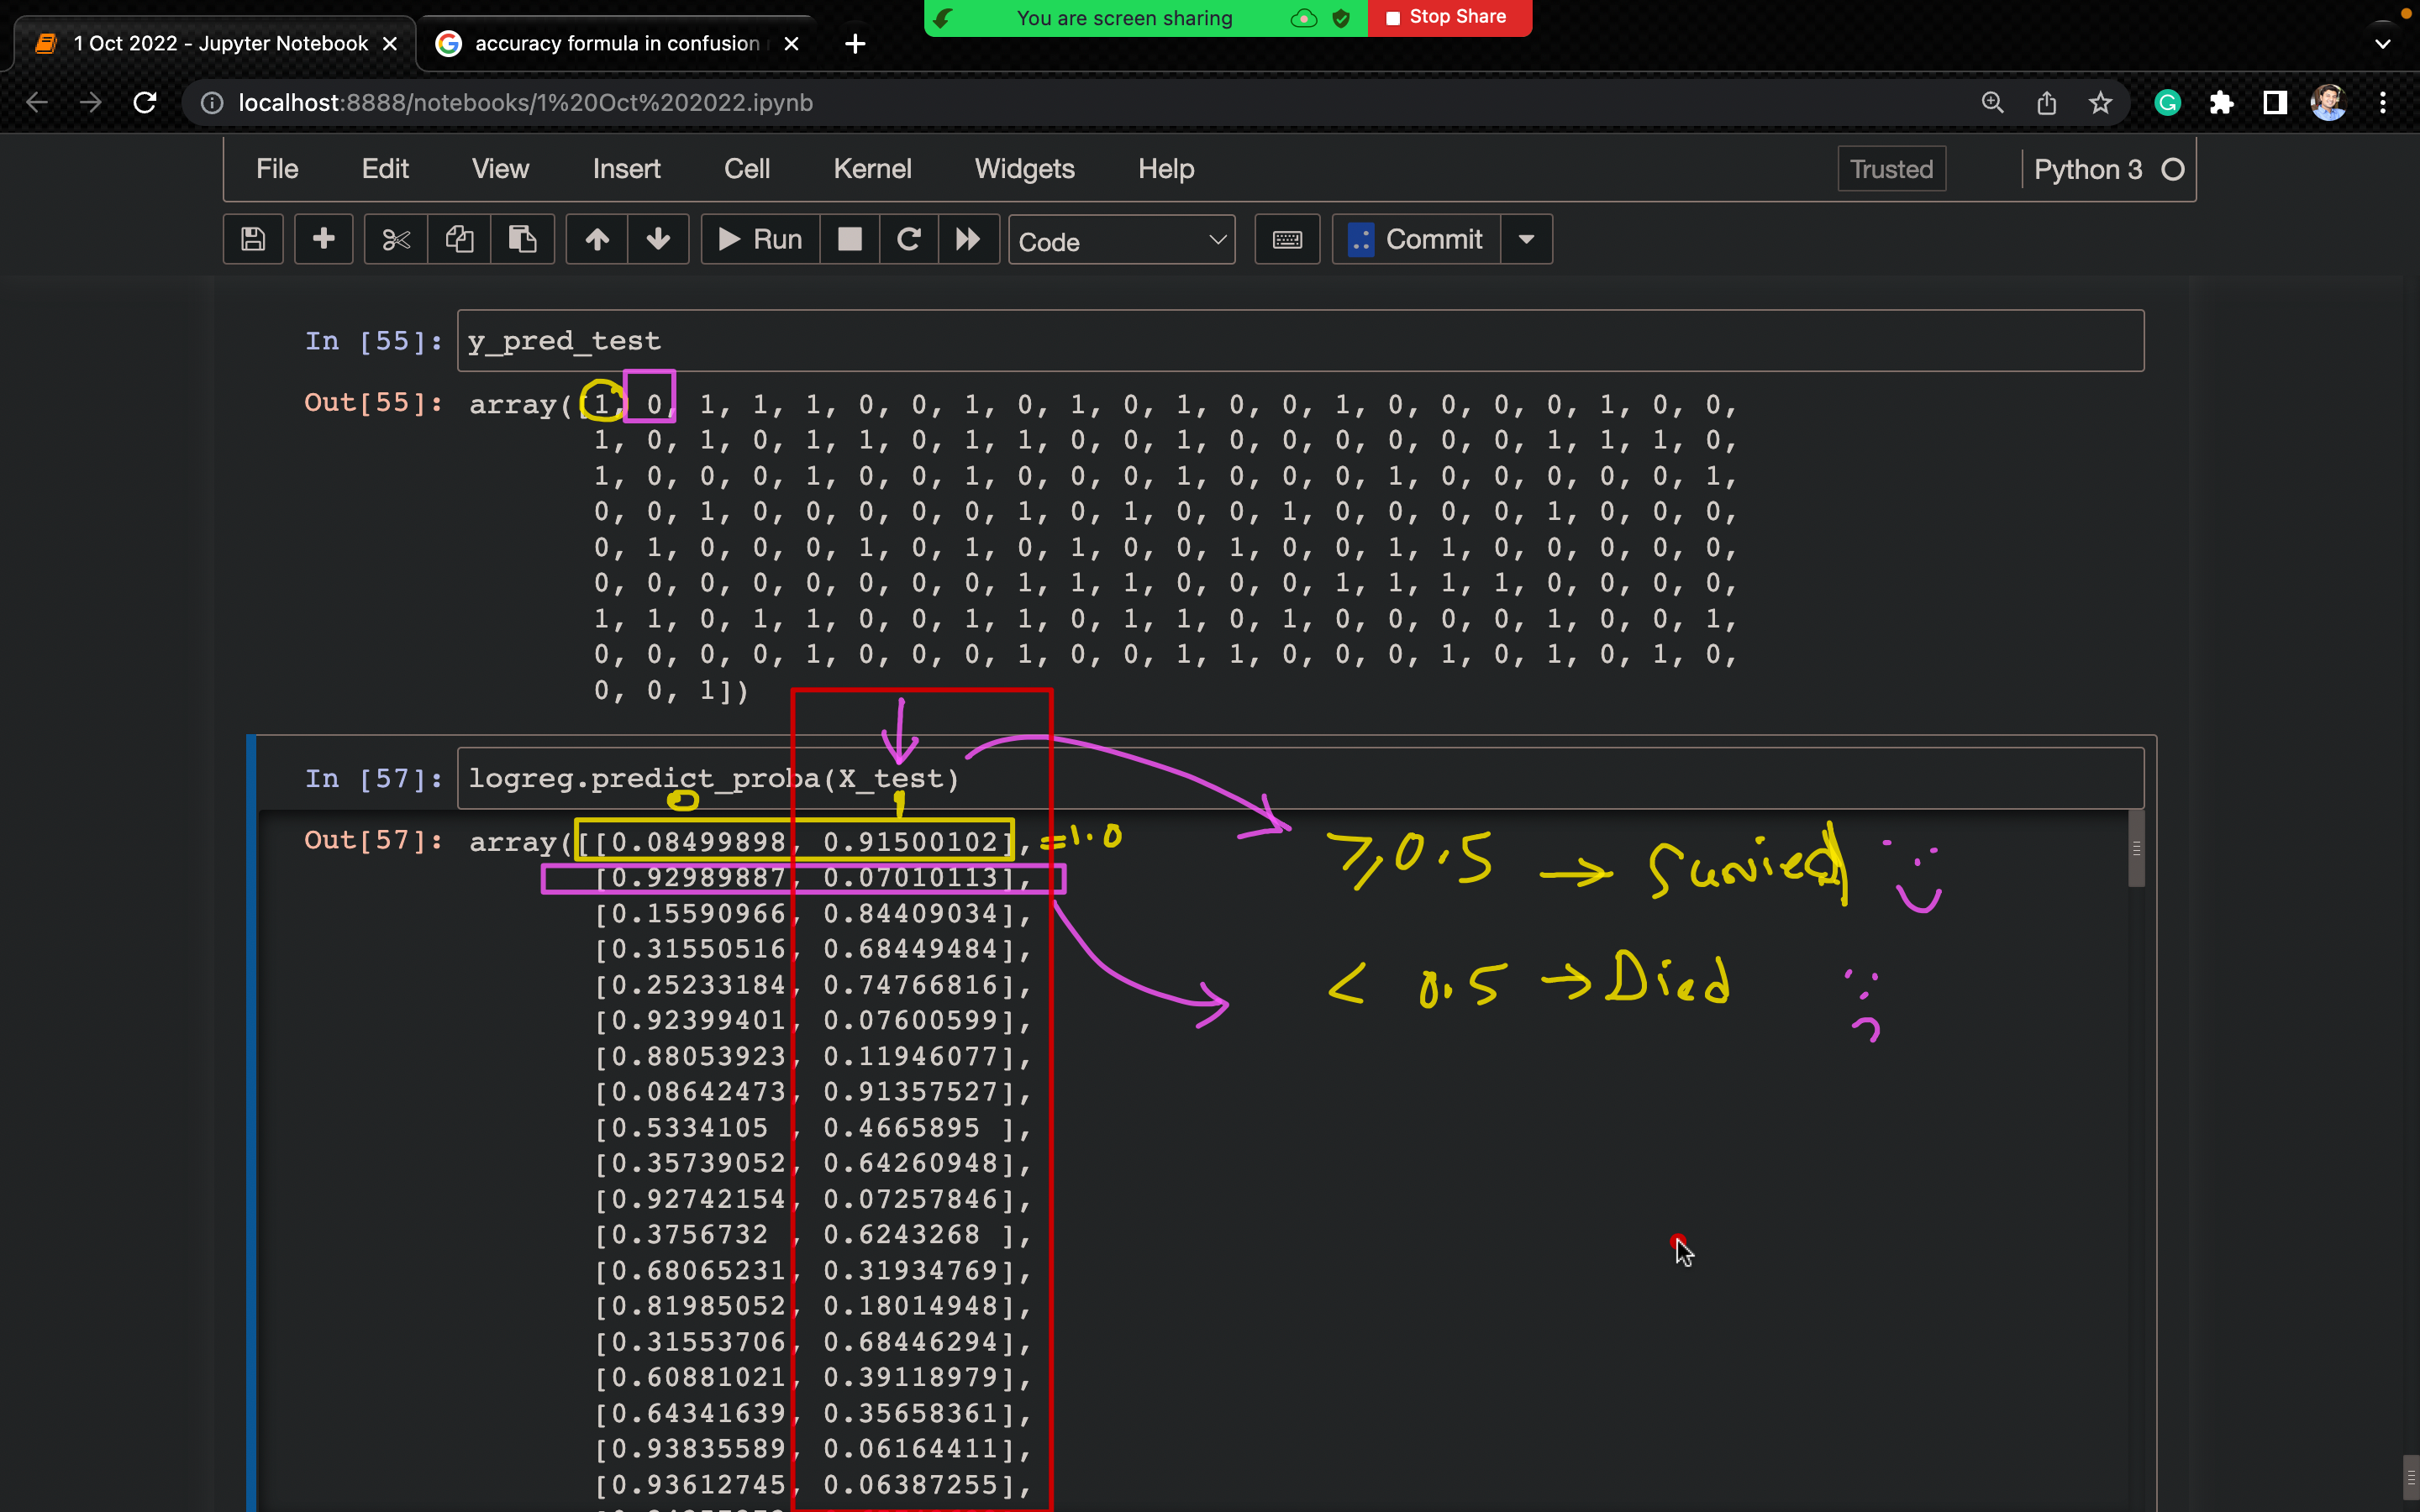

In [60]:
logreg.predict_proba(X_test)[:,1]

array([0.91500102, 0.07010113, 0.84409034, 0.68449484, 0.74766816,
       0.07600599, 0.11946077, 0.91357527, 0.4665895 , 0.64260948,
       0.07257846, 0.6243268 , 0.31934769, 0.18014948, 0.68446294,
       0.39118979, 0.35658361, 0.06164411, 0.06387255, 0.65742628,
       0.06692029, 0.09360124, 0.95939151, 0.20300519, 0.64310085,
       0.07093735, 0.92542488, 0.79871703, 0.18371816, 0.93981603,
       0.63617595, 0.39154845, 0.31242104, 0.58171448, 0.07946701,
       0.32801641, 0.36769017, 0.07008663, 0.47336685, 0.07688608,
       0.62139858, 0.52884362, 0.88264213, 0.34080275, 0.83794028,
       0.06460248, 0.27355595, 0.16077715, 0.5333198 , 0.20315345,
       0.26179126, 0.83741519, 0.19716672, 0.16575544, 0.06933232,
       0.58547788, 0.17817611, 0.29912254, 0.02069454, 0.64176414,
       0.19789059, 0.1083684 , 0.15468537, 0.34203707, 0.35198348,
       0.63876632, 0.08426537, 0.11123583, 0.56593196, 0.11120634,
       0.05164736, 0.34624353, 0.45791214, 0.07010113, 0.76680

In [63]:
np.where(logreg.predict_proba(X_test)[:,1] > 0.5, 1, 0)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [64]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [65]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1] > 0.75, 1, 0)

In [66]:
accuracy_score(y_test, preds1)

0.7262569832402235

In [67]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1] > 0.70, 1, 0)

In [68]:
accuracy_score(y_test, preds2)

0.7541899441340782

In [69]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1] > 0.65, 1, 0)

In [70]:
accuracy_score(y_test, preds3)

0.7653631284916201

In [71]:
preds4 = np.where(logreg.predict_proba(X_test)[:,1] > 0.60, 1, 0)

In [72]:
accuracy_score(y_test, preds4)

0.7821229050279329

In [73]:
preds5 = np.where(logreg.predict_proba(X_test)[:,1] > 0.55, 1, 0)

In [74]:
accuracy_score(y_test, preds5)

0.7932960893854749

In [75]:
preds6 = np.where(logreg.predict_proba(X_test)[:,1] > 0.45, 1, 0)

In [76]:
accuracy_score(y_test, preds6)

0.7932960893854749

In [77]:
preds7 = np.where(logreg.predict_proba(X_test)[:,1] > 0.40, 1, 0)

In [78]:
accuracy_score(y_test, preds7)

0.7877094972067039

In [79]:
preds8 = np.where(logreg.predict_proba(X_test)[:,1] > 0.35, 1, 0)

In [80]:
accuracy_score(y_test, preds8)

0.7932960893854749

In [81]:
preds9 = np.where(logreg.predict_proba(X_test)[:,1] > 0.30, 1, 0)

In [82]:
accuracy_score(y_test, preds9)

0.7541899441340782

__The model is giving the best accuracy at threshold=0.5.__

# Multi Class Classification

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
y = iris.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [8]:
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(multi_class='ovr')

NameError: name 'LogisticRegression' is not defined

In [ ]:
model = clf.fit(X_std,y)

In [ ]:
model

In [ ]:
new_observation = [[.5,.5,.5,.5]]
model.predict(new_observation)

In [ ]:
model.predict_proba(new_observation)

In [ ]:
new_observation = [[.75,.54,.65,.05]]
model.predict(new_observation)

In [ ]:
model.predict_proba(new_observation)

# Take Home Task

We did a very raw implementation of Logistic Regression for multi-class classification problem on iris data. Now, you have to do a proper TTS and apply proper scaling technique as a part of exercise and come up with various models. At the end, you are also expected to conslude your finding regarding the best model and why do you think so.

# Happy Learning